In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-14 09:29:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.166.240, 172.217.166.16, 172.217.27.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   238KB/s    in 4m 46s  

2020-09-14 09:34:04 (234 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [3]:
# Defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# compile model

model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics = ['accuracy'])
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    
                    epochs=100)

Epoch 1/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6906 - acc: 0.5375 - val_loss: 0.6959 - val_acc: 0.4990
Epoch 2/100
100/100 [==============================] - 7s 68ms/step - loss: 0.6653 - acc: 0.6085 - val_loss: 0.6355 - val_acc: 0.6680
Epoch 3/100
100/100 [==============================] - 7s 68ms/step - loss: 0.6274 - acc: 0.6590 - val_loss: 0.6127 - val_acc: 0.6790
Epoch 4/100
100/100 [==============================] - 7s 69ms/step - loss: 0.5834 - acc: 0.6985 - val_loss: 0.5722 - val_acc: 0.6970
Epoch 5/100
100/100 [==============================] - 7s 69ms/step - loss: 0.5447 - acc: 0.7245 - val_loss: 0.5792 - val_acc: 0.6860
Epoch 6/100
100/100 [==============================] - 7s 68ms/step - loss: 0.5125 - acc: 0.7495 - val_loss: 0.5919 - val_acc: 0.7000
Epoch 7/100
100/100 [==============================] - 7s 66ms/step - loss: 0.4885 - acc: 0.7675 - val_loss: 0.5461 - val_acc: 0.7280
Epoch 8/100
100/100 [==============================] - 7s 68ms

In [12]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


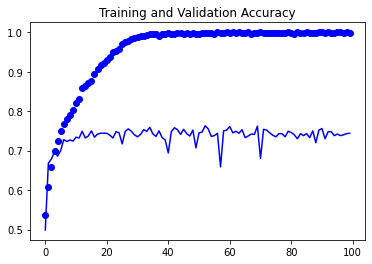

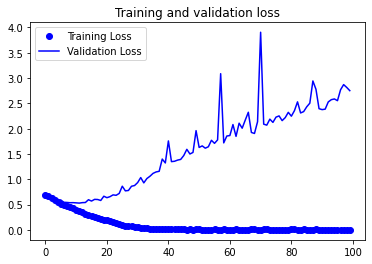

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Lets see the impact of DATA AUGMENTATION

In [14]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-14 09:57:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.166.16, 172.217.167.208, 172.217.27.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.166.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   239KB/s    in 4m 43s  

2020-09-14 10:02:44 (236 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [15]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [16]:
# Defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# compile model

model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics = ['accuracy'])



In [17]:
## Data augmentation

train_datagem = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)


In [18]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = 100,    # 2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,    # 1000 images = batch_size * steps
    verbose= 2    # for seeing the training progress
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
Epoch 1/100
100/100 - 7s - loss: 0.6859 - acc: 0.5560 - val_loss: 0.6618 - val_acc: 0.6300
Epoch 2/100
Epoch 1/100
100/100 - 7s - loss: 0.6374 - acc: 0.6260 - val_loss: 0.6696 - val_acc: 0.5940
Epoch 3/100
Epoch 1/100
100/100 - 7s - loss: 0.5930 - acc: 0.6895 - val_loss: 0.5942 - val_acc: 0.6790
Epoch 4/100
Epoch 1/100
100/100 - 7s - loss: 0.5614 - acc: 0.7120 - val_loss: 0.5734 - val_acc: 0.6990
Epoch 5/100
Epoch 1/100
100/100 - 7s - loss: 0.5363 - acc: 0.7290 - val_loss: 0.5633 - val_acc: 0.7080
Epoch 6/100
Epoch 1/100
100/100 - 7s - loss: 0.5136 - acc: 0.7440 - val_loss: 0.5523 - val_acc: 0.7170
Epoch 7/100
Epoch 1/100
100/100 - 6s - loss: 0.4827 - acc: 0.7640 - val_loss: 0.5700 - val_acc: 0.6950
Epoch 8/100
Epoch 1/100
100/100 - 7s - loss: 0.4623 - acc: 0.7865 - val_loss: 0.5435 - val_acc: 0.7230
Epoch 9/100
Epoch 1/100
100/100 - 7s - loss: 0.4292 - acc: 0.7900 - val_loss: 0.5253 - val_a

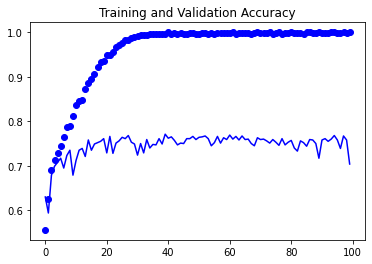

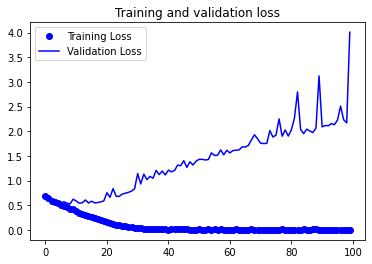

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## This is to study the imapact of Data Augmentation... 